# ANALISIS DE LA CALIDAD DEL VINO - Regresión

El objetivo de esta kata es guiarnos a través de los principales pasos que componen un proyecto de Machine Learning.

Existen ocho pasos principales:

1. Encuadrar el problema y tener la visión global.

2. Obtener los datos.

3. Explorar los datos para obtener ideas.

4. Preparar los datos para exponer lo mejor posible los patrones de datos subyacentes a los algoritmos de Machine Learning.

5. Explorar muchos modelos diferentes y preseleccionar los mejores.

6. Afinar nuestros modelos y combinarlos en una gran solución.

7. Presentar nuestra solución.

8. Implantar, monitorizar y mantener nuestro sistema.


# Encuadrar el problema y tener la visión global

Disponemos un conjunto de datos que contiene diversas características de variantes de tinto y blanco del vino portugués "Vinho Verde". Disponemos de variables químicas, como son la cantidad de alcohol, ácido cítrico, acidez, densidad, pH, etc; así como de una variable sensorial y subjetiva como es la puntuación con la que un grupo de expertos calificaron la calidad del vino: entre 0 (muy malo) y 10 (muy excelente).

El proyecto que nos encargan es que desarrollemos un modelo que pueda predecir la puntuación de calidad dados dichos indicadores bioquímicos.

¿Cómo se enmarcaría este problema (supervisado, no supervisado, etc.)?

¿Cuál es la variable objetivo? ¿Cuáles son los predictores?

¿Cómo vamos a medir el rendimiento de nuestro modelo?

Verificar las asunciones: por ejemplo, para qué se va a utilizar nuestra predicción de puntuación de calidad, ¿se va a utilizar para que otro sistema posterior los catalogue como "malo", "medio", "bueno" o "excelente"? ¿Qué implicaciones tendría?

# Obtener los datos

En este apartado tendríamos que lidiar con el origen de los datos. ¿Se encuentran en una bbdd? ¿Cuál es el formato? ¿Disponemos de las credenciales de acceso? ¿Disponemos de espacio para su manipulación? ¿Se trata de datos sensibles?

Importa las librerías necesarias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn import metrics

%matplotlib inline

Lee los datos y crea un DataFrame

In [2]:
white = pd.read_csv("data/wine-quality/winequality.csv", sep=";")

# Explorar los datos

En este aparatado comprobaremos el tamaños de los datos, su naturaleza (si son series temporales, datos geográficos, etc.), su tipo (numéricos, categóricos, fechas, texto, objetos, float, etc.) y si existen valores ausentes. Si se trata de aprendizaje supervisado identificaremos cuál/cuáles son los atributos objetivo. Visualizaremos los datos y comprobaremos si existen correlaciones entre ellos y de qué tipo. También identificaremos posibles transformaciones que debamos realizar sobre ellos. Incluso podríamos identificar la necesidad de crear nuevos datos a partir de los existentes.

*Por error a la hora de recopilar los datos del dataset se han duplicado filas. Antes de hacer nada las eliminamos*

In [3]:
# white.duplicated().sum()

In [4]:
white.drop_duplicates(inplace=True)

¿Cuál es el tamaño de los datasets?

In [5]:
white.shape

(5318, 12)

Es decir, 5.318 instancias (filas) y 12 atributos (columnas)

Muestra las primeras instancias del dataset:

In [6]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


Muestra información básica sobre los campos del dataset:

In [7]:
white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5318 non-null   float64
 1   volatile acidity      5318 non-null   float64
 2   citric acid           5318 non-null   float64
 3   residual sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free sulfur dioxide   5318 non-null   float64
 6   total sulfur dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.1 KB


Hacemos un resumen rápido de los principales indicadores descriptivos del dataset

In [8]:
pd.DataFrame({"Tipo": white.dtypes,
              "Unicos": white.nunique(),
              "Nulos": white.isnull().sum(),
              "Nulos percent": white.isnull().sum() / len(white),
              "Media": white.mean(),
              "Desviacion": white.std()})

,Tipo,Unicos,Nulos,Nulos percent,Media,Desviacion
fixed acidity,float64,106,0,0.0,7.215523,1.319777
volatile acidity,float64,187,0,0.0,0.344171,0.168264
citric acid,float64,89,0,0.0,0.318522,0.147177
residual sugar,float64,316,0,0.0,5.049605,4.500645
chlorides,float64,214,0,0.0,0.056700,0.036865
free sulfur dioxide,float64,135,0,0.0,30.030463,17.804365
total sulfur dioxide,float64,276,0,0.0,114.107747,56.783848
density,float64,998,0,0.0,0.994536,0.002966
pH,float64,108,0,0.0,3.224639,0.160403
sulphates,float64,111,0,0.0,0.533402,0.149753


Mmmmm, no existen nulos, qué dataset 

In [9]:
white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5318.0,7.215523,1.319777,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5318.0,0.344171,0.168264,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5318.0,0.318522,0.147177,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5318.0,5.049605,4.500645,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5318.0,0.056700,0.036865,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5318.0,30.030463,17.804365,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5318.0,114.107747,56.783848,6.00000,74.0000,116.00000,153.75000,440.00000
density,5318.0,0.994536,0.002966,0.98711,0.9922,0.99466,0.99677,1.03898
pH,5318.0,3.224639,0.160403,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5318.0,0.533402,0.149753,0.22000,0.4300,0.51000,0.60000,2.00000


¿Cómo se distribuyen las variables? Realiza un gráfico compuesto que muestre un histograma por cada variable

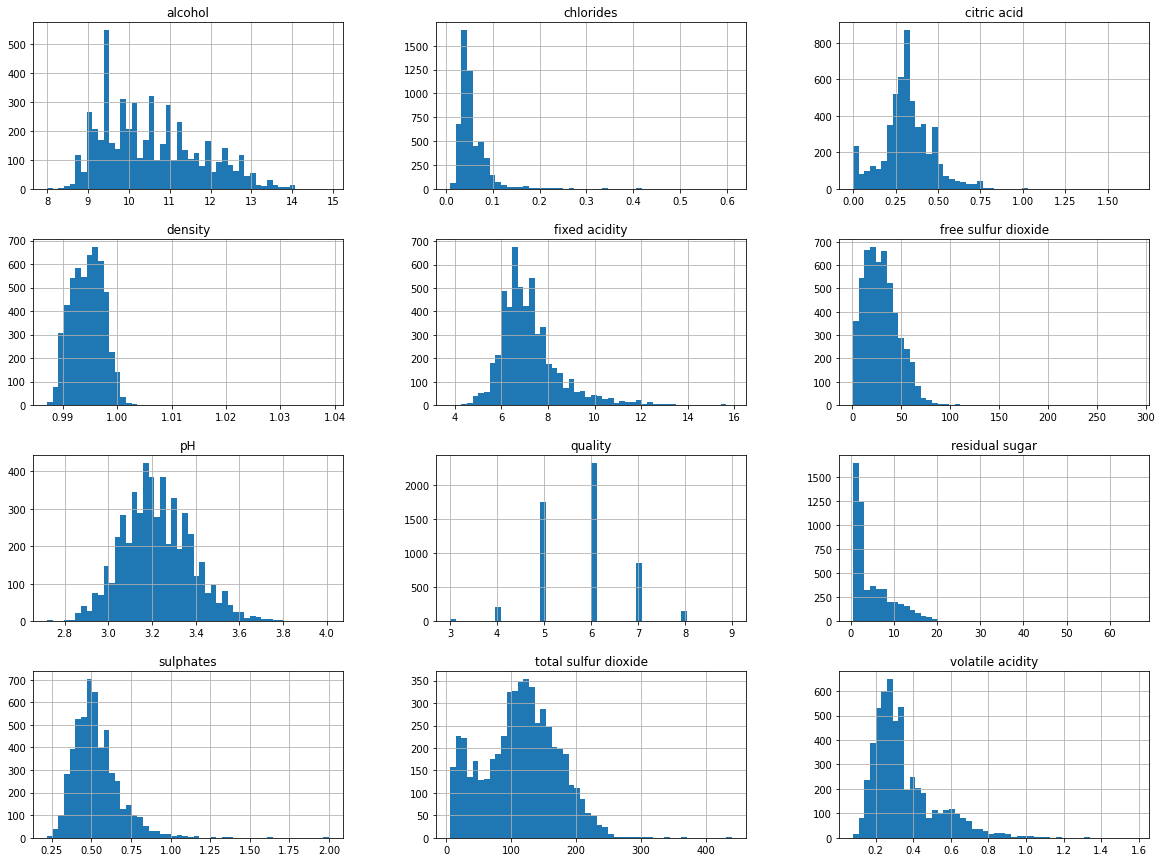

In [10]:
white.hist(bins=50, figsize=(20,15));

Comprobemos cómo se distribuye nuestra variable objetivo, la puntución de calidad:

In [11]:
print(f"Porcentaje de cada una de las puntuaciones de calidad")
white["quality"].value_counts(normalize=True)*100

Porcentaje de cada una de las puntuaciones de calidad


6    43.681835
5    32.925912
7    16.077473
4     3.873637
8     2.783001
3     0.564122
9     0.094020
Name: quality, dtype: float64

Se encuentra significativamente desbalanceado. La mayoría de las instancias (75%) tienen puntuaciones de 6 ó 5.

Comprueba las correlaciones entre los atributos del dataset

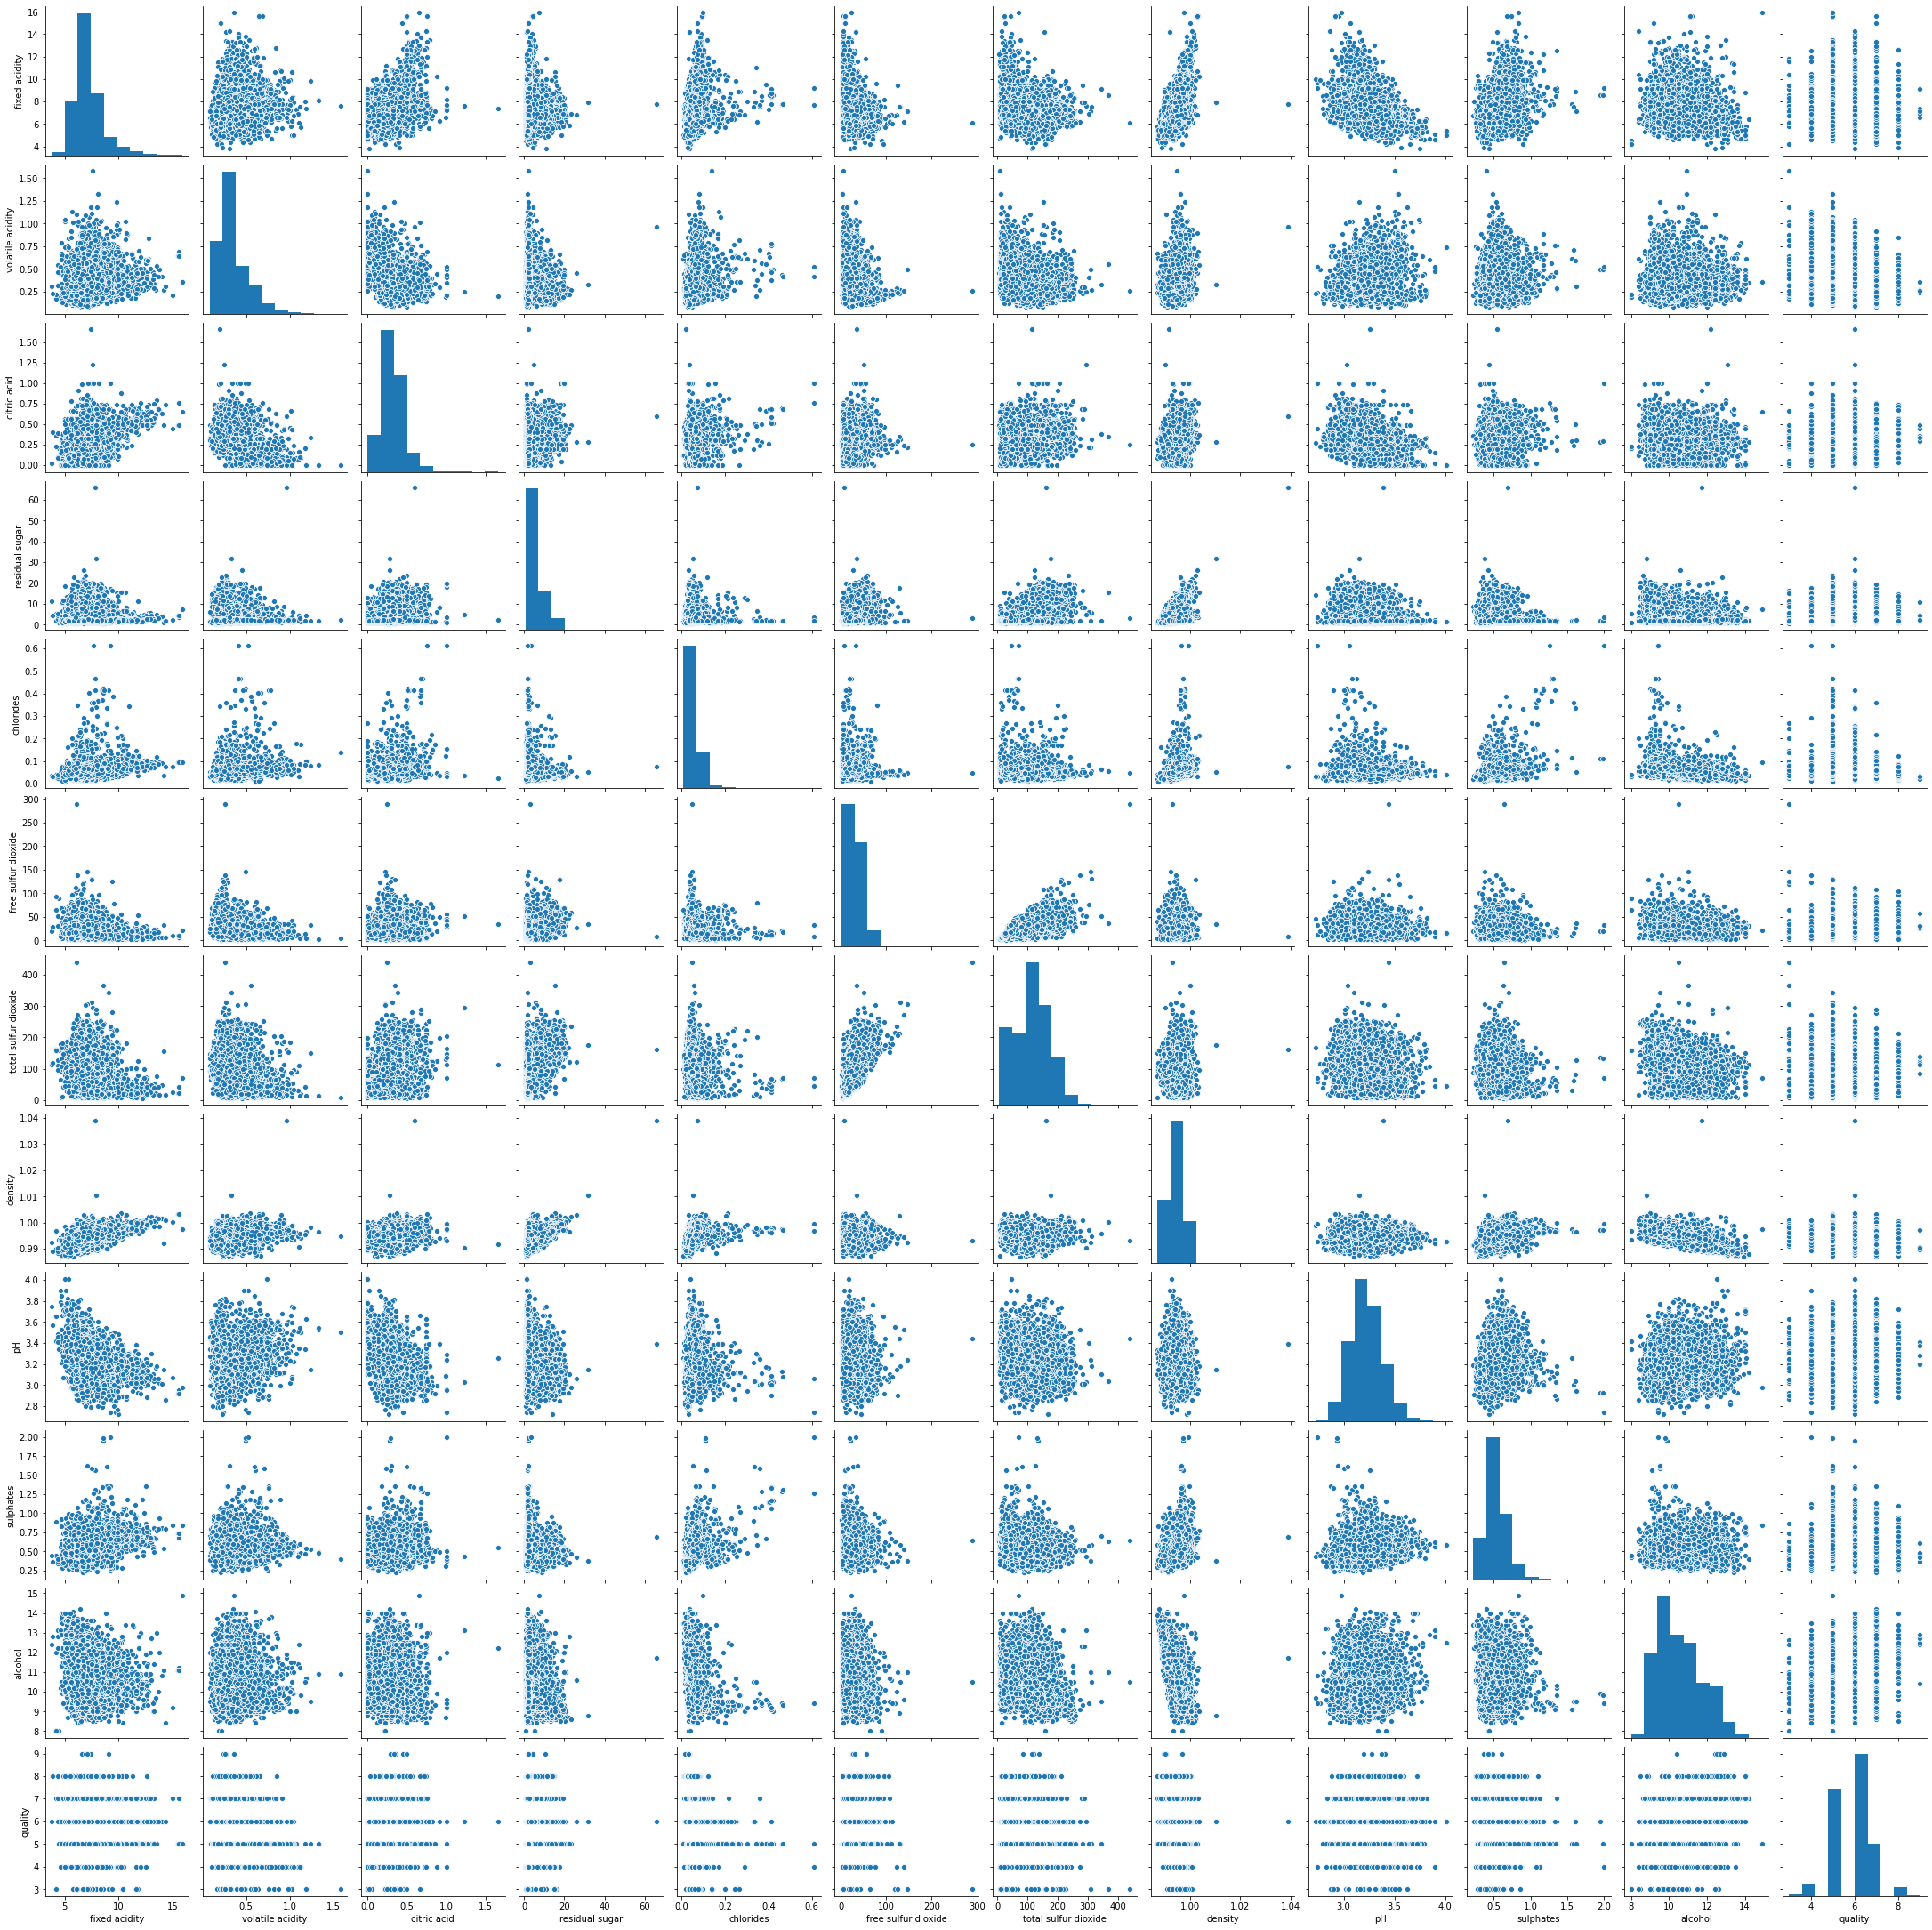

In [12]:
sns.pairplot(white)

In [13]:
corr_matrix = white.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214595,0.330225,-0.104641,0.288843,-0.281375,-0.327462,0.478148,-0.271094,0.304728,-0.102696,-0.080190
volatile acidity,0.214595,1.000000,-0.384395,-0.163896,0.367573,-0.348865,-0.400715,0.308375,0.246837,0.227645,-0.065510,-0.265354
citric acid,0.330225,-0.384395,1.000000,0.146078,0.055107,0.131113,0.194888,0.094663,-0.344675,0.059061,-0.005572,0.097926
residual sugar,-0.104641,-0.163896,0.146078,1.000000,-0.123302,0.399090,0.487593,0.520867,-0.234443,-0.174946,-0.305334,-0.056824
chlorides,0.288843,0.367573,0.055107,-0.123302,1.000000,-0.186518,-0.269896,0.371665,0.025914,0.404905,-0.269516,-0.201960
free sulfur dioxide,-0.281375,-0.348865,0.131113,0.399090,-0.186518,1.000000,0.720576,0.006360,-0.141968,-0.198075,-0.169887,0.054199
total sulfur dioxide,-0.327462,-0.400715,0.194888,0.487593,-0.269896,0.720576,1.000000,0.006677,-0.223000,-0.275877,-0.248942,-0.050183
density,0.478148,0.308375,0.094663,0.520867,0.371665,0.006360,0.006677,1.000000,0.034377,0.282494,-0.667861,-0.326301
pH,-0.271094,0.246837,-0.344675,-0.234443,0.025914,-0.141968,-0.223000,0.034377,1.000000,0.168287,0.097392,0.039789
sulphates,0.304728,0.227645,0.059061,-0.174946,0.404905,-0.198075,-0.275877,0.282494,0.168287,1.000000,-0.017166,0.042040


Muestra solo las correlaciones de la variable objetivo con el resto de atributos

In [14]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.469216
citric acid             0.097926
free sulfur dioxide     0.054199
sulphates               0.042040
pH                      0.039789
total sulfur dioxide   -0.050183
residual sugar         -0.056824
fixed acidity          -0.080190
chlorides              -0.201960
volatile acidity       -0.265354
density                -0.326301
Name: quality, dtype: float64

Representa gráficamente dichas correlaciones

In [15]:
white.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.21,0.33,-0.10,0.29,-0.28,-0.33,0.48,-0.27,0.30,-0.10,-0.08
volatile acidity,0.21,1.00,-0.38,-0.16,0.37,-0.35,-0.40,0.31,0.25,0.23,-0.07,-0.27
citric acid,0.33,-0.38,1.00,0.15,0.06,0.13,0.19,0.09,-0.34,0.06,-0.01,0.10
residual sugar,-0.10,-0.16,0.15,1.00,-0.12,0.40,0.49,0.52,-0.23,-0.17,-0.31,-0.06
chlorides,0.29,0.37,0.06,-0.12,1.00,-0.19,-0.27,0.37,0.03,0.40,-0.27,-0.20
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.19,1.00,0.72,0.01,-0.14,-0.20,-0.17,0.05
total sulfur dioxide,-0.33,-0.40,0.19,0.49,-0.27,0.72,1.00,0.01,-0.22,-0.28,-0.25,-0.05
density,0.48,0.31,0.09,0.52,0.37,0.01,0.01,1.00,0.03,0.28,-0.67,-0.33
pH,-0.27,0.25,-0.34,-0.23,0.03,-0.14,-0.22,0.03,1.00,0.17,0.10,0.04
sulphates,0.30,0.23,0.06,-0.17,0.40,-0.20,-0.28,0.28,0.17,1.00,-0.02,0.04


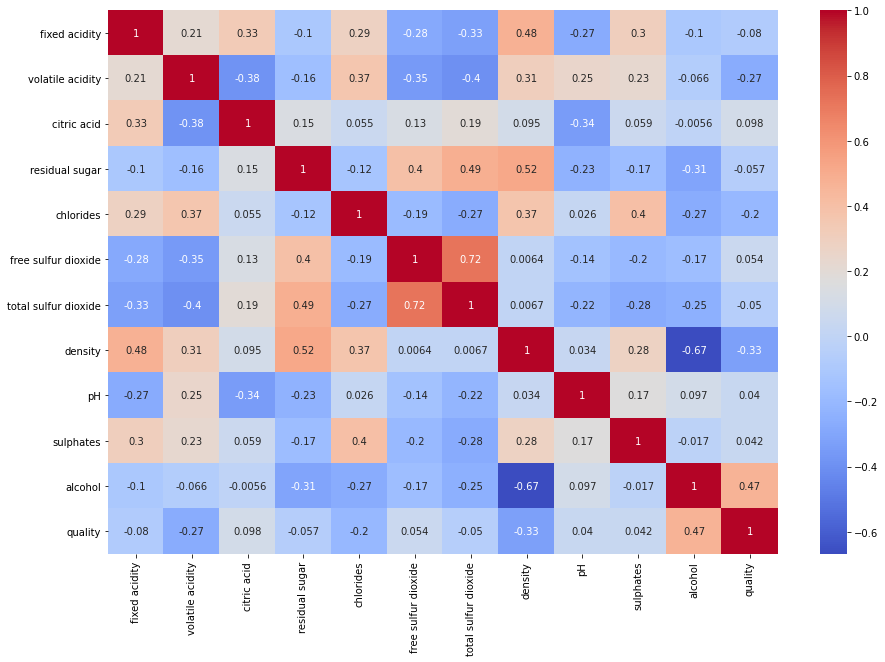

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(white.corr(), annot=True, cmap='coolwarm')
plt.show()

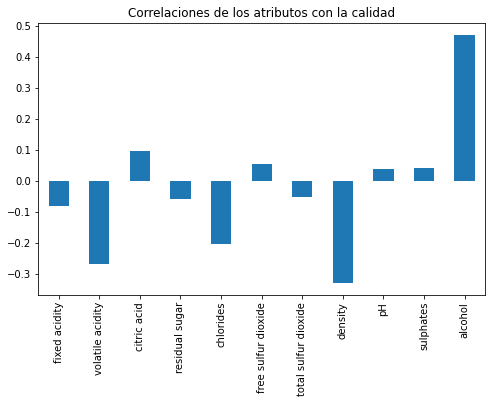

In [17]:
plt.figure(figsize=(8,5))
corr_matrix["quality"].drop("quality").plot(kind='bar')
plt.title("Correlaciones de los atributos con la calidad")
plt.show()

# Preparar los datos

En este apartado llevaríamos a cabo la ingeniería de características o *feature engineering*: realizar las transformaciones necesarias en los datos (escalado, transformaciones de valores categóricos, etc.). Crearíamos nuevas features si fuera necesario. También trataríamos el problemas de los valores nulos. Procederíamos a la limpieza del dataset, eliminando aquellos atributos que no proporcionen información útil.

# Seleccionar y entrenar modelos

El objetivo de esta fase es entrenar muchos modelos rápidamente y sin refinar, de diferentes categorías (es decir, lineales, SVM, Random Forests, redes neuronales, etc.) usando los parámetros estándares. La idea es tener un visión rápida de qué modelos son más prometedores. Medir y comparar la ejecución de todos ellos. Selecciona los mejores modelos.

Crea el dataset de predictores y el dataset con la variable objetivo

In [18]:
predict_columns = white.columns[:-1]
predict_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [19]:
X = white[predict_columns]
y = white["quality"]

Crea los datasets necesarios para dispones de datos de entrenamiento y prueba

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Selecciona y crea el modelo que vas a entrenar, en este caso un modelo de regresión lineal

In [21]:
lr = LinearRegression()

Entrena el modelo con los datos de entrenamiento

In [22]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(*Opcional*) Dado que estamos entrenando un modelo de regresión lineal, ¿cuáles son los coeficientes estimados de la ecuación de regresión resultantes después del entrenamiento?

Recordemos la fórmula de la ecuación de regresión:

![regresion](images/formula_regresion.png)

In [23]:
lr.coef_

array([ 6.53877166e-02, -1.13501337e+00,  9.64414735e-02,  3.62275237e-02,
       -8.38461482e-01,  6.64852806e-03, -2.62991130e-03, -5.70236118e+01,
        5.63629613e-01,  7.37881984e-01,  2.68371866e-01])

(*Opcional*) ¿Cuál sería el término independiente estimado de la ecuación de regresión resultante después del entrenamiento?

In [24]:
lr.intercept_

57.32007206748286

In [25]:
pd.DataFrame(lr.coef_, X_test.columns, columns=["Coeficientes"])

,Coeficientes
fixed acidity,0.065388
volatile acidity,-1.135013
citric acid,0.096441
residual sugar,0.036228
chlorides,-0.838461
free sulfur dioxide,0.006649
total sulfur dioxide,-0.002630
density,-57.023612
pH,0.563630
sulphates,0.737882


Una vez entrenado el modelo, realiza predicciones con los datos de prueba

In [26]:
y_pred = lr.predict(X_test)

veamos, cuáles han sido las predicciones:

In [27]:
df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Error': y_test-y_pred})
df

,Real,Predicción,Error
5755,7,6.338465,0.661535
6158,5,5.166429,-0.166429
4647,7,6.229227,0.770773
1947,5,4.883898,0.116102
664,6,5.763753,0.236247
...,...,...,...
4663,7,6.004910,0.995090
2921,6,5.507784,0.492216
3153,6,6.472469,-0.472469
158,8,6.123436,1.876564


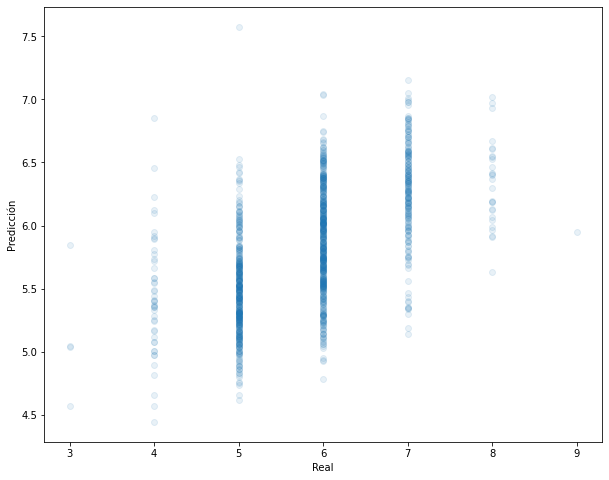

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.show()

¿Qué rendimiento tiene el modelo con las métricas que has elegido?

In [29]:
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R2: {lr.score(X_test, y_test)}")

MAE: 0.5572374963034327
MSE: 0.5211139760122319
RMSE: 0.7218822452534983
R2: 0.33498168479174895


In [30]:
metrics.explained_variance_score(y_test, y_pred)

0.3350508612172952

¿Cómo se distribuyen los errores de predicción?

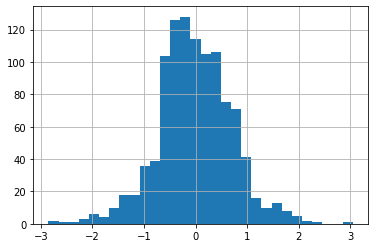

In [31]:
df["Error"].hist(bins=30);

### Comentarios iniciales a los resultados

La puntuación de R2 es muy baja. Según el valor obtenido de R2, nuestro modelo apenas puede explicar un 33% de la varianza. Es decir, el porcentaje de relación entre las variables que puede explicarse mediante nuestro modelo lineal es del 33,32%. Esto no es necesariamente malo, este indicador no explica por si solo si un modelo es bueno o malo.

R2 varía entre 0 y 1. Es la proporción de la varianza en la variable dependiente (*nuestra variable objetivo*) que es predecible a partir de las variables independientes (*nuestros predictores*). Si la predicción fuera exactamente igual a lo real, R2 = 1 (es decir, 100%).

El RMSE = 0,69. Es decir, tenemos un error típico de predicción de 0,69.

Según la gráfica podemos observar que nuestro modelo no es muy bueno para valores extremos de puntuación. De hecho no es capaz de predecir ninguna puntuación de 3 ni de 8. Según vimos en la distribución de la variable objetivo, se encuentra muy desbalanceada, apenas existen obervaciones para los valores extremos, por lo que el modelo no tiene suficientes datos de entrenamiento para todas las puntuaciones de calidad.

### Selección de características

Vamos a usar RFECV para determinar el nº de features válidas con cross-validation.

In [32]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

lr = LinearRegression()
selector = RFECV(lr, step=1, cv=StratifiedKFold())
selector = selector.fit(X_train, y_train)
pd.DataFrame({"Feature": predict_columns, "Support": selector.support_})

C:\Program Files\Python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,Feature,Support
0,fixed acidity,True
1,volatile acidity,True
2,citric acid,True
3,residual sugar,True
4,chlorides,True
5,free sulfur dioxide,True
6,total sulfur dioxide,True
7,density,True
8,pH,True
9,sulphates,True


In [33]:
pd.DataFrame({"Feature": predict_columns, "Ranking": selector.ranking_})

,Feature,Ranking
0,fixed acidity,1
1,volatile acidity,1
2,citric acid,1
3,residual sugar,1
4,chlorides,1
5,free sulfur dioxide,1
6,total sulfur dioxide,1
7,density,1
8,pH,1
9,sulphates,1


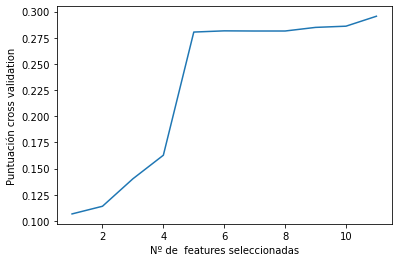

In [34]:
# Dibuja el número de features vs la puntuación a través de cross-validation
plt.figure()
plt.xlabel("Nº de  features seleccionadas")
plt.ylabel("Puntuación cross validation")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

La conclusión es que todas las variables son importantes para el modelo, ya que se obtiene la máxima puntuación con las 10 features seleccionadas.

In [35]:
selector.grid_scores_

array([0.10667118, 0.11398806, 0.14024238, 0.16274418, 0.28039993,
       0.28155799, 0.28140567, 0.2814066 , 0.28485964, 0.28601229,
       0.29551295])

***************************************************************

**ENTRENAMOS y VALIDAMOS CON CROSS-VALIDATION con los datos entrenamiento, ¡¡¡siempre!!!**

Todos lo que hemos realizados hasta aquí era para mostrar rápidamente el proceso de entrenamiento y predicción de un modelo. Sin embargo, los datos de test no los debemos usar hasta el final del proceso, es decir, hasta que no hayamos ajustado suficientemente un modelo como para considerlo nuestro mejor modelo. Durante el proceso previo de entrenamiento y validación se deben usar siempre los datos de entrenamiento. Mediante el proceso de cross-validation extraeremos de dicho conjunto de entrenamiento un subconjunto de validación que nos permitirá validar los diferentes ajustes que vayamos realizando hasta obtener un modelo definitivo.

In [36]:
def evaluate_model(estimator, X_train, y_train, cv=10):
    """Print and return cross validation of model
    """
    scoring = ["neg_mean_absolute_error", "neg_mean_squared_error", "r2"]
    scores = cross_validate(estimator, X_train, y_train, return_train_score=True, cv=cv, scoring=scoring)
    
    val_mae_mean, val_mae_std = -scores['test_neg_mean_absolute_error'].mean(), \
                                -scores['test_neg_mean_absolute_error'].std()
    
    train_mae_mean, train_mae_std = -scores['train_neg_mean_absolute_error'].mean(), \
                                    -scores['train_neg_mean_absolute_error'].std()
    
    val_mse_mean, val_mse_std = -scores['test_neg_mean_squared_error'].mean(), \
                                -scores['test_neg_mean_squared_error'].std()
    
    train_mse_mean, train_mse_std = -scores['train_neg_mean_squared_error'].mean(), \
                                    -scores['train_neg_mean_squared_error'].std()
    
    val_rmse_mean, val_rmse_std = np.sqrt(-scores['test_neg_mean_squared_error']).mean(), \
                                  np.sqrt(-scores['test_neg_mean_squared_error']).std()
    
    train_rmse_mean, train_rmse_std = np.sqrt(-scores['train_neg_mean_squared_error']).mean(), \
                                      np.sqrt(-scores['train_neg_mean_squared_error']).std()
    
    val_r2_mean, val_r2_std = scores['test_r2'].mean(), scores['test_r2'].std()
    
    train_r2_mean, train_r2_std = scores['train_r2'].mean(), scores['train_r2'].std()

    
    print(f"val_MAE_mean: {val_mae_mean} - (std: {val_mae_std})")
    print(f"train_MAE_mean: {train_mae_mean} - (std: {train_mae_std})")
    print(f"val_MSE_mean: {val_mse_mean} - (std: {val_mse_std})")
    print(f"train_MSE_mean: {train_mse_mean} - (std: {train_mse_std})")
    print(f"val_RMSE_mean: {val_rmse_mean} - (std: {val_rmse_std})")
    print(f"train_RMSE_mean: {train_rmse_mean} - (std: {train_rmse_std})")
    print(f"val_R2_mean: {val_r2_mean} - (std: {val_r2_std})")
    print(f"train_R2_mean: {train_r2_mean} - (std: {train_r2_std})")
    
    
    result = {
        "Val MAE": val_mae_mean,
        "Val MAE std": val_mae_std,
        "Train MAE": train_mae_mean,
        "Train MAE std": train_mae_std,
        "Val MSE": val_mse_mean,
        "Val MSE std": val_mse_std,
        "Train MSE": train_mse_mean,
        "Train MSE std": train_mse_std,
        "Val RMSE": val_rmse_mean,
        "Val RMSE std": val_rmse_std,
        "Train RMSE": train_rmse_mean,
        "Train RMSE std": train_rmse_std,
        "Val R2": val_r2_mean,
        "Val R2 std": val_r2_std,
        "Train R2": train_rmse_mean,
        "Train R2 std": train_r2_std,
    }

    return result

Vamos a mostrar las métricas para nuestro modelo de regresión lineal, que definiremos como nuestra **línea base**:

In [37]:
lin_scores = evaluate_model(lr, X_train, y_train)

val_MAE_mean: 0.5678058362984492 - (std: -0.018415371461642967)
train_MAE_mean: 0.5658708158947021 - (std: -0.002011679904135136)
val_MSE_mean: 0.5441209711549607 - (std: -0.03679107138438395)
train_MSE_mean: 0.5397995674066932 - (std: -0.0041111347954123)
val_RMSE_mean: 0.7372265746585503 - (std: 0.024858575425430185)
train_RMSE_mean: 0.7347052005562338 - (std: 0.002799228879064588)
val_R2_mean: 0.29169113104808486 - (std: 0.03635200091502911)
train_R2_mean: 0.3000911088632812 - (std: 0.003919803611180707)


****************************************************

# Exploración de varios modelos

Vamos a probar de forma rápida varios modelos de regresión. Seleccionamos algunos de los modelos de regresión: Regresión Lineal, Lasso, ElasticNet, Ridge, Extre Trees y RandomForest.

In [38]:
#models = [LinearRegression(), Lasso(alpha=0.1), ElasticNet(),
#          Ridge(), SVR(kernel="linear"), ExtraTreesRegressor(), RandomForestRegressor()]

models = [LinearRegression(), Lasso(alpha=0.1), ElasticNet(),
          Ridge(), ExtraTreesRegressor(), RandomForestRegressor()]

model_names = ["Regresión Lineal", "Lasso", "ElasticNet",
               "Ridge", "Extra Tree", "Random Forest"]

In [39]:
models

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0

Entrenamiento y predicción

In [40]:
mae = []
mse = []
rmse = []
r2 = []
preds = []

for model in range(len(models)):
    print(f"Paso {model+1} de {len(models)}")
    print(f"...evaluando {model_names[model]}")
    
    rg_scores = evaluate_model(models[model], X_train, y_train)
    
    mae.append(rg_scores["Val MAE"])
    mse.append(rg_scores["Val MSE"])
    rmse.append(rg_scores["Val RMSE"])
    r2.append(rg_scores["Val R2"])
    #preds.append(y_pred)

Paso 1 de 6
...evaluando Regresión Lineal
val_MAE_mean: 0.5678058362984492 - (std: -0.018415371461642967)
train_MAE_mean: 0.5658708158947021 - (std: -0.002011679904135136)
val_MSE_mean: 0.5441209711549607 - (std: -0.03679107138438395)
train_MSE_mean: 0.5397995674066932 - (std: -0.0041111347954123)
val_RMSE_mean: 0.7372265746585503 - (std: 0.024858575425430185)
train_RMSE_mean: 0.7347052005562338 - (std: 0.002799228879064588)
val_R2_mean: 0.29169113104808486 - (std: 0.03635200091502911)
train_R2_mean: 0.3000911088632812 - (std: 0.003919803611180707)
Paso 2 de 6
...evaluando Lasso
val_MAE_mean: 0.6069293187916339 - (std: -0.023033809614564527)
train_MAE_mean: 0.6060336740975556 - (std: -0.002560934304475351)
val_MSE_mean: 0.5977362271237945 - (std: -0.04446926496022594)
train_MSE_mean: 0.5953797649784311 - (std: -0.004879765905189512)
val_RMSE_mean: 0.7725954388265782 - (std: 0.028853336516970172)
train_RMSE_mean: 0.7716020769119794 - (std: 0.003162259247923949)
val_R2_mean: 0.2225099852

In [41]:
df_result = pd.DataFrame({"Modelo": model_names,
                          "MAE": mae,
                          "MSE": mse,
                          "RMSE": rmse,
                          "R2": r2})

In [42]:
df_result

,Modelo,MAE,MSE,RMSE,R2
0,Regresión Lineal,0.567806,0.544121,0.737227,0.291691
1,Lasso,0.606929,0.597736,0.772595,0.222510
2,ElasticNet,0.682840,0.760146,0.871220,0.012463
3,Ridge,0.568938,0.545490,0.738160,0.289914
4,Extra Tree,0.535383,0.486130,0.696704,0.368293
5,Random Forest,0.539863,0.487254,0.697421,0.367102


Vamos a visualizar cómo se han comportado cada uno de ellos:

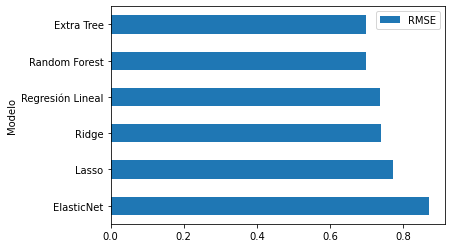

In [43]:
df_result.sort_values(by="RMSE", ascending=False).plot.barh("Modelo", "RMSE");

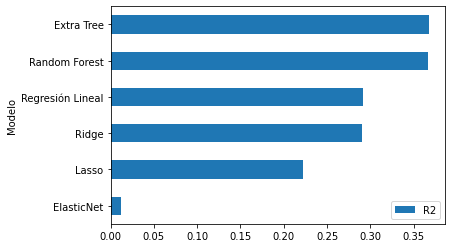

In [44]:
df_result.sort_values(by="R2").plot.barh("Modelo", "R2");

In [45]:
for i in range(len(preds)):
    plt.scatter(y_test, preds[i], alpha=0.1)
    plt.xlabel("Real")
    plt.ylabel("Predicción")
    plt.title(model_names[i])
    plt.show()

# Afinar nuestros mejores modelos

El modelo que arroja mejores resultados es **extra-trees**. Vamos a realizar un ajuste más fino con él.

In [46]:
param_grid = [
    {'n_estimators': range(10, 300, 10), 'max_features': [2, 3, 4, 5, 8, "auto"], 'bootstrap': [True, False]}
]


xtree_reg = ExtraTreesRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(xtree_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=-1,
                                           oob_score=False, random_state=42,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_g

In [47]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 290}

In [48]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.7384702774853202 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
0.716741891453639 {'bootstrap': True, 'max_features': 2, 'n_estimators': 20}
0.7085029072031359 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.7055541578518189 {'bootstrap': True, 'max_features': 2, 'n_estimators': 40}
0.7033496222096219 {'bootstrap': True, 'max_features': 2, 'n_estimators': 50}
0.7032789963756649 {'bootstrap': True, 'max_features': 2, 'n_estimators': 60}
0.7020608728644471 {'bootstrap': True, 'max_features': 2, 'n_estimators': 70}
0.7005140841348343 {'bootstrap': True, 'max_features': 2, 'n_estimators': 80}
0.6990742265820472 {'bootstrap': True, 'max_features': 2, 'n_estimators': 90}
0.6988414732356524 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.69835779919418 {'bootstrap': True, 'max_features': 2, 'n_estimators': 110}
0.6982450175991552 {'bootstrap': True, 'max_features': 2, 'n_estimators': 120}
0.6980386550324545 {'bootstrap': True, 'max_features': 2, 'n_est

In [49]:
#feature_importance = grid_search.best_estimator_.feature_importances_

In [50]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

In [51]:
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R2: {final_model.score(X_test, y_test)}")

MAE: 0.5139000518537724
MSE: 0.45659480523544294
RMSE: 0.6757179923869446
R2: 0.41731766544793925


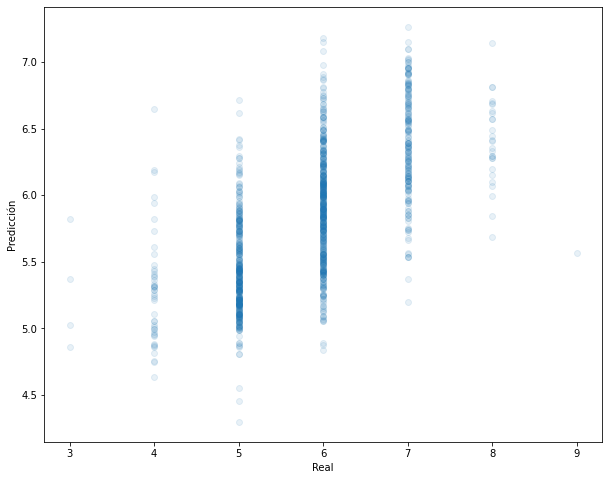

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.show()

**Comprobamos qué predictores son más relevantes para la predicción:**

In [53]:
feature_importances = final_model.feature_importances_
feature_importances

array([0.06559387, 0.1044932 , 0.06935517, 0.07133208, 0.07225945,
       0.09009039, 0.07590474, 0.09058832, 0.0691215 , 0.07118121,
       0.22008008])

In [54]:
sorted(zip(feature_importances, X_test.columns), reverse=True)

[(0.2200800813582921, 'alcohol'),
 (0.10449319875527721, 'volatile acidity'),
 (0.0905883190469106, 'density'),
 (0.09009038949067925, 'free sulfur dioxide'),
 (0.07590473652599129, 'total sulfur dioxide'),
 (0.07225944865176506, 'chlorides'),
 (0.07133208342123065, 'residual sugar'),
 (0.07118120629142717, 'sulphates'),
 (0.06935516992636624, 'citric acid'),
 (0.0691214970505081, 'pH'),
 (0.06559386948155234, 'fixed acidity')]

Text(0.5, 1.0, 'Feature Importances')

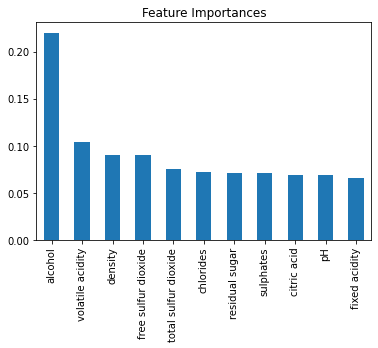

In [55]:
feature_imp = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar')
plt.title('Feature Importances')

**Vamos a ver cómo se distribuyen los errores:**

In [56]:
df_resul = pd.DataFrame({"Pred": y_pred,
              "Real": y_test,
              "error": y_pred - y_test,
              "error_abs": abs(y_pred - y_test)})

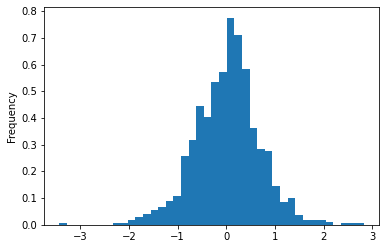

In [57]:
df_resul["error"].plot.hist(bins=40, density=True);

Parace que los errores siguen una distribución gaussiana.

In [58]:
df_resul["error"].apply(np.square).mean()

0.45659480523544294

¿Cuál es el MAE que se produce en la puntuaciónes 6?:

In [59]:
df_resul[df_resul["Real"].isin([6])]["error"].abs().mean()

0.3437013037105609

Más en general ¿Cuál es el MAE que se produce en cada puntuación de calidad?

In [60]:
df_resul.groupby("Real")["error_abs"].mean()

Real
3    2.268966
4    1.286657
5    0.462774
6    0.343701
7    0.617315
8    1.597190
9    3.434483
Name: error_abs, dtype: float64

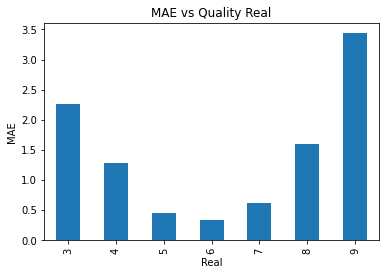

In [61]:
df_resul.groupby("Real")["error_abs"].mean().plot.bar()
plt.title("MAE vs Quality Real")
plt.ylabel("MAE");

Se comprueba que en las puntuaciones de calidad extremas el error es elevado, sobre todo en la puntuación 3. Las puntuaciones 5 y 6 es donde menos error se produce.

### Comentarios finales a los resultados

Después de probar diversos modelos, el que mejores resultados a proporcionados es ExtraTrees. Tras un ajuste fino del mismo conseguimos una importante mejora:

+ El modelo básico de regresión linea ofrece un R2: 0.33303955208271774
+ El modelo de Extra Tree ofrece un R2: 0.580961107130739

Sin embargo, la puntuación de R2 sigue siendo muy baja. Según el valor obtenido de R2, nuestro modelo apenas puede explicar un 58% de la varianza. Es decir, el porcentaje de relación entre las variables que puede explicarse mediante nuestro modelo lineal es del 58,09%.

R2 varía entre 0 y 1. Es la proporción de la varianza en la variable dependiente (*nuestra variable objetivo*) que es predecible a partir de las variables independientes (*nuestros predictores*). Si la predicción fuera exactamente igual a lo real, R2 = 1 (es decir, 100%).

El RMSE = 0,55. Es decir, tenemos un error típico de predicción de 0,55.

Según la gráfica de distribución de MAE podemos observar que nuestro modelo no es nada bueno para valores extremos de puntuación. De hecho no es capaz de predecir ninguna puntuación de 3 y apenas alguna de 8. Según vimos en la distribución de la variable objetivo, ésta se encuentra muy desbalanceada, apenas existen observaciones para los valores extremos, por lo que el modelo no tiene suficientes datos de entrenamiento para todas las puntuaciones de calidad.

Como consideración final, deberíamos probar a enfocar el modelado como un problema de clasificación, para evaluar si ofrece mejores resultados que un problema de regresión.

# Guardado del modelo

Como paso final, guardamos nuestro modelo entranado para futuras predicciones.

In [62]:
import joblib

joblib.dump(final_model, "final_model.joblib", compress=True)

['final_model.joblib']